OBJECTIVES
Data Visualization
let's practice what we have learned so far and visualize some data !

In order to validate this checkpoint you are asked to accomplish the following tasks:

Preprocessing part
After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values

As a next step apply what you have learned in the course to preprocess your data: find missing informations and replace them by the appropriate values.

Verify that your data is ready to be treated.

2. Visualization part

Let’s begin now the data visualization part : 

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem  

Visualize the correlation between Sex and Age in a plot of your choosing, the visualized plot should give us obvious deductions concerning the importance of age and Sex in the survival of the individuals.

Pick two other features and study their impact on the survival of the individuals 

Have a look at this function:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

Try running the function, analyse what does it do exactly and what are the utilities of it, write a paragraph describing your analysis (the paragraph should be in english)

Use the groupby function combined with the mean() to view the relation between Pclass and survived 

As a final step try to drop the useless columns such as Names

In fact, we dropped the column Names because we evaluated it as useless, well that's not the case, we can create a very useful feature from the names

your task now is to create a new column called Title which contain the appropriate Title for each individual ( hint : extract the title from the column Names)

Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)

As you should've seen, there is a lot of titles which makes the feature not very practical, let's try to group these titles into more useful ones

hint: use the following dictionary

Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer”,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty"

                  "the Countess": "Royalty",

                    "Dona":       "Royalty”,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs

                    "Master" :    "Master"

                    }

let's visualize the same correlations using these new titles now.

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Use what you have learned so far to conclude if this feature is useful or not.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_row', df.shape[1])
df = pd.read_csv('titanic-passengers.csv', sep=';')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [15]:
df.shape

(891, 12)

In [24]:
df.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

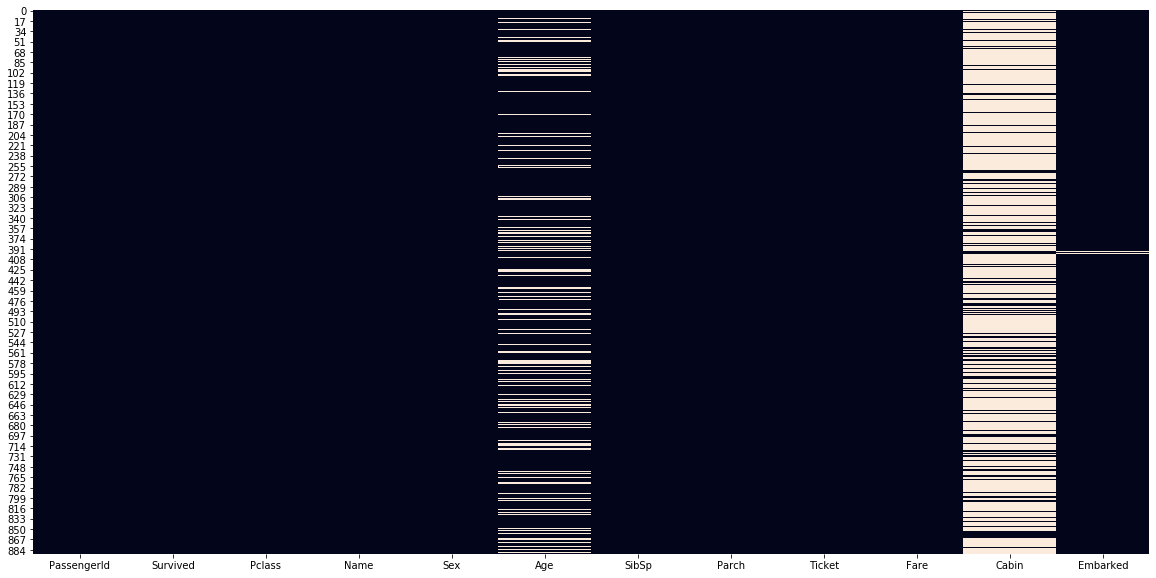

In [34]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [39]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64